<h2><font color="#004D7F" size=6>Módulo 8. Aprendizaje No Supervisado</font></h2>



<h1><font color="#004D7F" size=5>8.2.1. Principal Component Analysis (PCA)</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
# Si se tiene más o pantalla retina que salga con más resolución
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


<a id="section1"></a>
# <font color="#004D7F"> 1. Datos </font>

In [2]:
df_datos = pd.DataFrame(np.array([[10,1,2,7],[7,2,1,10],[2,9,7,3],[3,6,10,2],[1,8,8,3]]),
                        index = ['Alicia', 'Bernardo', 'Carmen', 'Diego', 'Elena'],
                        columns = ['Falafel', 'Kebab', 'Shushi', 'Cereales'])
df_datos.head()

,Falafel,Kebab,Shushi,Cereales
Alicia,10,1,2,7
Bernardo,7,2,1,10
Carmen,2,9,7,3
Diego,3,6,10,2
Elena,1,8,8,3


In [3]:
X = df_datos.values

## <font color="#004D7F"> Obtención de las k componentes principales </font>

Para el ejemplo, se obtendrán dos componentes.

In [4]:
k = 2 

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=k)
pca.fit(X)

C = pca.components_
print('Componentes:\n', C)
print('\nNorma de las componentes: ', np.linalg.norm(C, axis=1))

Componentes:
 [[ 0.51513273 -0.48597481 -0.53756393  0.45770272]
 [ 0.53008597 -0.46473441  0.49877565 -0.5042357 ]]

Norma de las componentes:  [1. 1.]


## <font color="#004D7F"> Pesos (loadings) </font>

In [8]:
pd.DataFrame(C.T, index=df_datos.columns, columns=['PC1', 'PC2'])

,PC1,PC2
Falafel,0.515133,0.530086
Kebab,-0.485975,-0.464734
Shushi,-0.537564,0.498776
Cereales,0.457703,-0.504236


Se observa que la primera componente recoge la preferencia por comida vegetariana, mientras que la segunda parece recoger preferencia por comida sana. 

## <font color="#004D7F"> Representación de los datos mediante componentes principales </font>


Para un caso

In [9]:
np.dot(C,X[0,:]-pca.mean_)

array([7.67344652, 2.01028501])

Para la matriz

In [10]:
# X_pc = pca.transform(X)                        # Ambos métodos son equivalentes
X_pc = np.dot(X - pca.mean_, C.T)
print(X_pc.round(2))

[[ 7.67  2.01]
 [ 7.55 -2.06]
 [-4.85 -1.44]
 [-4.95  2.49]
 [-5.42 -1.  ]]


Visualización

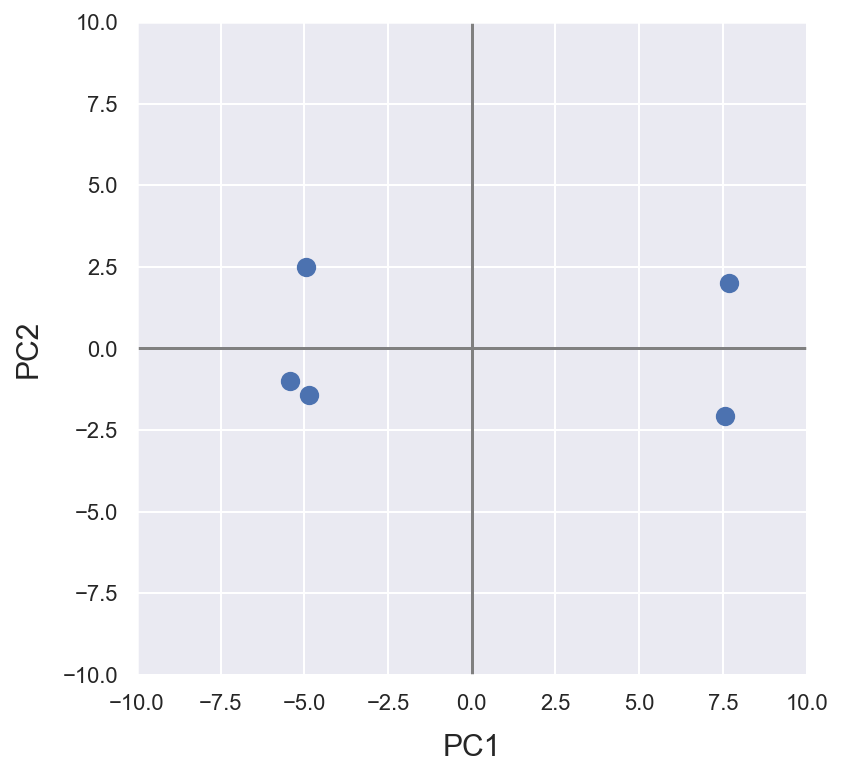

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(X_pc[:, 0], X_pc[:, 1], s=75, alpha=1)
plt.xlabel('PC1', fontsize=15, labelpad=10)
plt.ylabel('PC2',  fontsize=15, labelpad=10)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.axhline(0, color='grey')
plt.axvline(0, color='grey');

## <font color="#004D7F"> Reconstrucción de los datos a partir de las componentes principales </font>


Para un caso, como combinación lineal

In [14]:
# Los componentes
X_pc[0,:]

array([7.67344652, 2.01028501])

In [15]:
pca.mean_ + X_pc[0,0]*C[0,:] + X_pc[0,1]*C[1,:]

array([9.61846737, 0.5366497 , 2.47771316, 7.49849986])

Para un caso, como producto vectorial

In [16]:
np.dot(X_pc[0,:],C)+pca.mean_

array([9.61846737, 0.5366497 , 2.47771316, 7.49849986])

Para todos los casos

In [17]:
# X_app = pca.inverse_transform(X_pc)
X_app = np.dot(X_pc, C) + pca.mean_            # Ambos métodos son equivalentes

print('\nX')
print(X)
print('\nX_app')
print(X_app.round(2))


X
[[10  1  2  7]
 [ 7  2  1 10]
 [ 2  9  7  3]
 [ 3  6 10  2]
 [ 1  8  8  3]]

X_app
[[9.62 0.54 2.48 7.5 ]
 [7.4  2.49 0.51 9.49]
 [1.34 8.23 7.49 3.5 ]
 [3.37 6.45 9.5  1.48]
 [1.28 8.3  8.01 3.03]]


## <font color="#004D7F"> Coste (loss) </font>


In [18]:
from sklearn.metrics.pairwise import paired_distances

np.sum(paired_distances(X, X_app))

4.429479072650178

## <font color="#004D7F"> Varianza </font>


In [19]:
print('Varianza explicada (Autovalores):', pca.explained_variance_)  # También llamados eigenvalues
print('Varianza explicada ratio:', pca.explained_variance_ratio_)
print('Varianza explicada acumulada:', np.cumsum(pca.explained_variance_ratio_))
# Recordad que si ponemos 4 componentes será:
# La varianza explicada: 0
# Ratio: 0
# explicada acumulada: 1

Varianza explicada (Autovalores): [48.34709495  4.38266532]
Varianza explicada ratio: [0.89864489 0.08146218]
Varianza explicada acumulada: [0.89864489 0.98010707]


## <font color="#004D7F"> Interpretación </font>

Podemos interpretar la varianza de los datos como la suma de las varianzas de las variables. 

In [20]:
print(X)
varX = np.var(X, axis=0, ddof=1) # degrees of freedom
print('\nVarianzas:', varX)
print('Suma:', np.sum(varX))

[[10  1  2  7]
 [ 7  2  1 10]
 [ 2  9  7  3]
 [ 3  6 10  2]
 [ 1  8  8  3]]

Varianzas: [14.3 12.7 15.3 11.5]
Suma: 53.8


Obtenemos las cuatro componentes y la representación correspondiente los datos.

In [21]:
pca_all = PCA(n_components=4)
pca_all.fit(X);
X_pc_all = np.dot(X - pca_all.mean_, pca_all.components_.T)
X_pc_all.round(1)

array([[ 7.7,  2. ,  0.9,  0.1],
       [ 7.6, -2.1, -0.9, -0.1],
       [-4.9, -1.4,  1.2, -0.2],
       [-5. ,  2.5, -0.9, -0.1],
       [-5.4, -1. , -0.3,  0.3]])

Se calculan las varianzas de esta representación.

In [22]:
varX_pc_all = np.var(X_pc_all, axis=0, ddof=1) # El divisor en la varianza es n-ddof
print('Varianzas:', varX_pc_all)

Varianzas: [4.83470950e+01 4.38266532e+00 1.03158127e+00 3.86584620e-02]


Estas varianzas corresponden a los autovalores, y su suma es la misma que la varianza de los datos originales.

In [23]:
print(pca_all.explained_variance_)
print('Suma:', np.sum(varX_pc_all))

[4.83470950e+01 4.38266532e+00 1.03158127e+00 3.86584620e-02]
Suma: 53.80000000000005


## <font color="#004D7F"> Relación entre valores singulares y varianza </font>


Es necesario utilizar los cuatro valores singulares, es decir, los almacenados `pca_all`, obtenida con `k=4` (

In [24]:
print('Varianza explicada ratio:', pca.explained_variance_ratio_)

Varianza explicada ratio: [0.89864489 0.08146218]


In [25]:
pca_all.singular_values_[:k]**2/np.sum(pca_all.singular_values_**2)

array([0.89864489, 0.08146218])

## <font color="#004D7F"> Elección de K </font>



In [26]:
df_news = pd.read_csv('data/newsData.csv', index_col=0)
df_urls = (df_news['url']).to_frame()
df_news = df_news.drop(labels='url', axis=1).astype(float)
df_news.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
1,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
2,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
3,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
4,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
5,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


In [27]:
X_news = df_news.values

from sklearn.decomposition import PCA
pca_news = PCA(n_components=60)
pca_news.fit(X_news);

### <font color="#004D7F"> Método 1: Codo</font>


Identificar el punto a partir del cual la varianza se comienza a explicar más lentamente. 

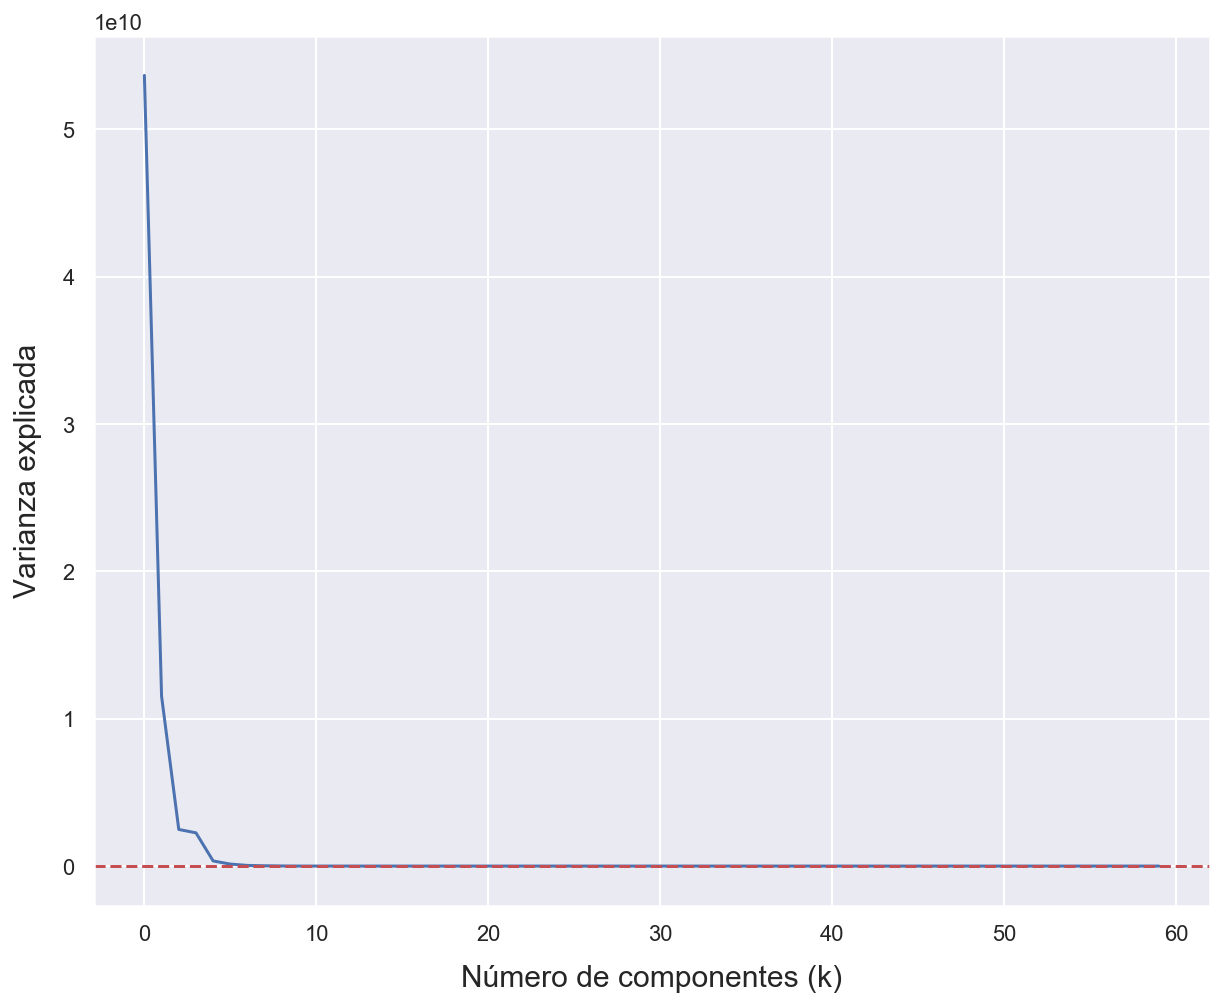

In [28]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(0,60), pca_news.explained_variance_)
plt.axhline(1,color='r',linestyle='--');
plt.ylabel("Varianza explicada", fontsize=15, labelpad=10)
plt.xlabel("Número de componentes (k)", fontsize=15, labelpad=10);


### <font color="#004D7F"> Método 2: Porcentaje de varianza explicada </font>


Se fija un porcentaje de varianza y se toman las k primeras componentes que sumen un porcentaje igual o mayor. 

In [29]:
total_variance = np.cumsum(pca_news.explained_variance_ratio_)
total_variance[:5] # Cinco primeros...

array([0.76136126, 0.92488101, 0.96014287, 0.99213515, 0.99705483])

Fijamos el 99% como varianza que se ha de _retener_ con la representación

In [30]:
np.min(np.where(total_variance>0.99))

3

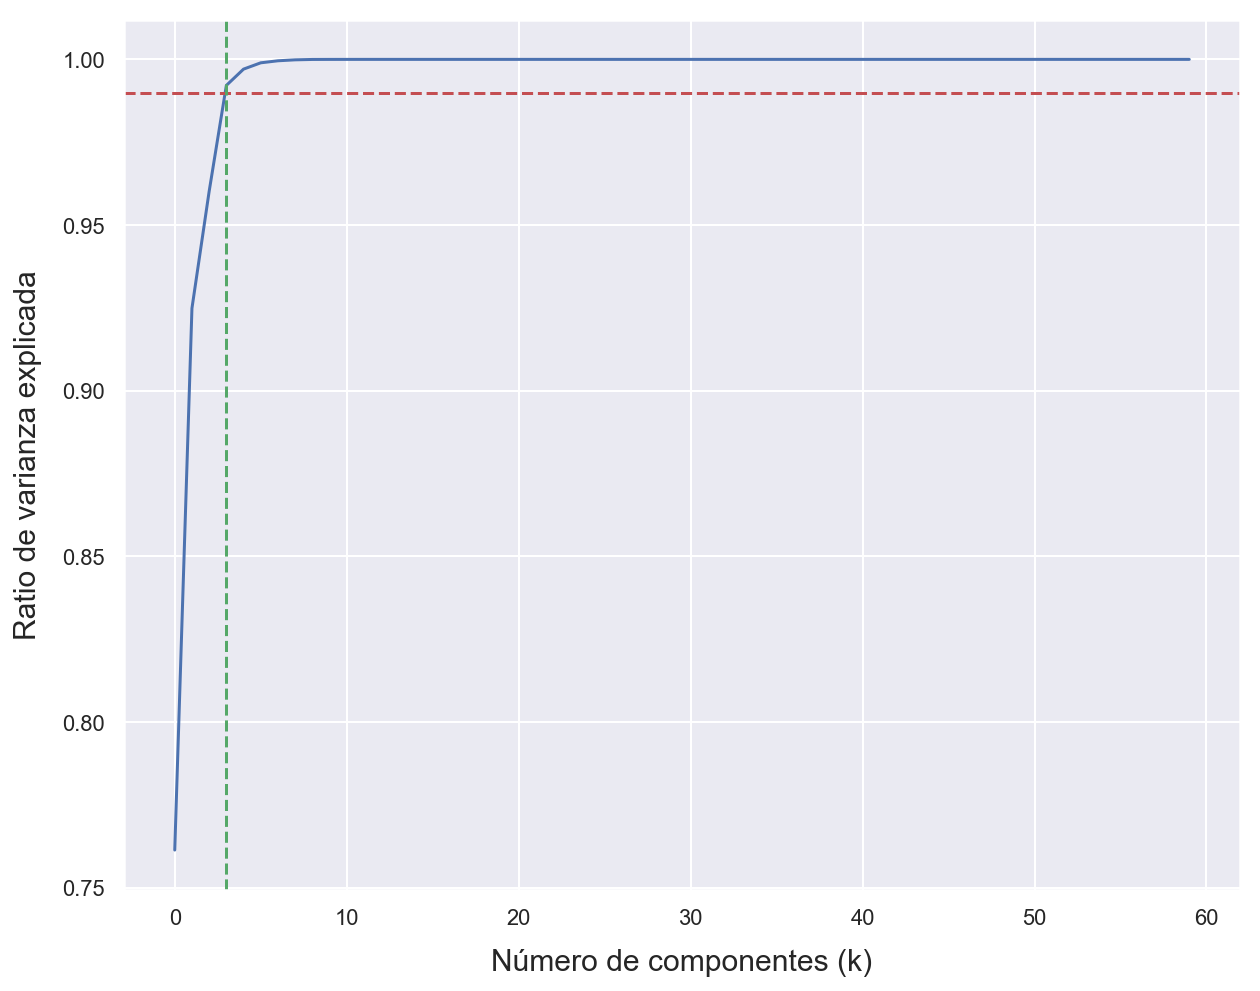

In [26]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(0,60), total_variance)
plt.axhline(0.99,color='r',linestyle='--');
plt.axvline(3,color='g',linestyle='--');
plt.ylabel("Ratio de varianza explicada", fontsize=15, labelpad=10)
plt.xlabel("Número de componentes (k)", fontsize=15, labelpad=10);

El objeto PCA de `sklearn` puede tomar como parámetro también el ratio de varianza que ha de preservar el modelo.

In [31]:
pca_news = PCA(0.99)
pca_news.fit(X_news)
np.cumsum(pca_news.explained_variance_ratio_)

array([0.76136126, 0.92488101, 0.96014287, 0.99213515])

### <font color="#004D7F"> Método 3: Kaiser-Guttman </font>

El autovalor es mayor que uno (para valores estandarizados a varianza 1). Se descartan componentes cuya varianza  es menor que la de la variable. 

In [32]:
from sklearn.preprocessing import StandardScaler

X_news_sc = StandardScaler().fit_transform(X_news)
pca_news_sc = PCA(n_components=60).fit(X_news)

np.max(np.where(pca_news_sc.explained_variance_>1))

21

# <font color="#004D7F"> Obtención de PCA con SVD </font>

Para utilizar estos métodos, es __necesario__ normalizar para que las medias de las variables sean 0. También se __recomienda__ escalar las características a desviación 1. 

### <font color="#004D7F"> Obtención de las componentes a partir de los datos </font>

In [38]:
X_0 = X - X.mean(0)

U, s, Vt = np.linalg.svd(X_0, full_matrices=False)

C = Vt[:k]
X_pc = U[:, :k]*s[:k] # La descomposición svd devuelve la proyección.

# En la reconstrucción de los datos orignales, se tiene que volver a sumar la media
X_app = np.dot(X_pc,C)+X.mean(0) 

print('Componentes:\n', C.round(2))
print('Valores singulares:', s[:k])
print('Varianza explicada ratio:', s[:k]**2/np.sum(s**2))
print('Varianza explicada acumulada:', np.cumsum(s[:k]**2/np.sum(s**2)))
print('\nX ')
print(X)
print('\nX_pca')
print(X_pc.round(2))
print('\nX_app')
print(X_app.round(2))

Componentes:
 [[-0.52  0.49  0.54 -0.46]
 [ 0.53 -0.46  0.5  -0.5 ]]
Valores singulares: [13.90641506  4.18696325]
Varianza explicada ratio: [0.89864489 0.08146218]
Varianza explicada acumulada: [0.89864489 0.98010707]

X 
[[10  1  2  7]
 [ 7  2  1 10]
 [ 2  9  7  3]
 [ 3  6 10  2]
 [ 1  8  8  3]]

X_pca
[[-7.67  2.01]
 [-7.55 -2.06]
 [ 4.85 -1.44]
 [ 4.95  2.49]
 [ 5.42 -1.  ]]

X_app
[[9.62 0.54 2.48 7.5 ]
 [7.4  2.49 0.51 9.49]
 [1.34 8.23 7.49 3.5 ]
 [3.37 6.45 9.5  1.48]
 [1.28 8.3  8.01 3.03]]


### <font color="#004D7F"> Obtención a partir de la matriz de covarianzas</font>


Este método calcula la descomposición en valores singulares de la matriz de covarianzas.

In [39]:
X0 = X - X.mean(0)

sigma = (X0.T @ X0) / X0.shape[0]

U,s,Vt = np.linalg.svd(sigma, full_matrices=False)
C = U[:,:k]

X_pc = X0 @ C
X_app = X_pc @ C.T + X.mean(0)

In [40]:
print('Componentes:\n',C.T)
print('Norma de las componentes: ', np.linalg.norm(U, axis=0))
print('Valores singulares:',  s[:k])
print('Variancia explicada ratio:', s[:k]/np.sum(s))
print('\nX ')
print(X)
print('\nX_pca')
print(X_pc.round(2))
print('\nX_app')
print(X_app.round(2))

Componentes:
 [[-0.51513273  0.48597481  0.53756393 -0.45770272]
 [ 0.53008597 -0.46473441  0.49877565 -0.5042357 ]]
Norma de las componentes:  [1. 1. 1. 1.]
Valores singulares: [38.67767596  3.50613226]
Variancia explicada ratio: [0.89864489 0.08146218]

X 
[[10  1  2  7]
 [ 7  2  1 10]
 [ 2  9  7  3]
 [ 3  6 10  2]
 [ 1  8  8  3]]

X_pca
[[-7.67  2.01]
 [-7.55 -2.06]
 [ 4.85 -1.44]
 [ 4.95  2.49]
 [ 5.42 -1.  ]]

X_app
[[9.62 0.54 2.48 7.5 ]
 [7.4  2.49 0.51 9.49]
 [1.34 8.23 7.49 3.5 ]
 [3.37 6.45 9.5  1.48]
 [1.28 8.3  8.01 3.03]]


<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>